In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from pickle import load
import pandas as pd
from os.path import join, exists
from os import makedirs
from tables import open_file
from scipy.special import softmax
import numpy as np
from plot_utils import *

In [26]:
# Universal plot settings
ASPECT = 2/3
sns.set_theme(context = 'paper', style='white', font = 'Arial')
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15, 'xtick.labelsize':12, 'ytick.labelsize':12})  

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams.update({'font.size': 20})

plt.rcParams['figure.figsize'] = [12, 8]
color_palette = {'H': '#FF0000', 'M': '#00FF00', 'L':'#0000FF', 'Z': 'k'}
%matplotlib inline
# color code:
# H red: #FF0000    M red: #B30000    L red: #660000    H green: #00FF00    M green: #00B300    L green:#006600
# H pref:#FF0000    M pref:#00FF00    L pref:#0000FF


In [3]:

# Plotting Switches

save_plot = True
rerun_calc = False
plot_c = True
plot_d = True
plot_e = False
plot_f = False
plot_g = False
plot_h = False
plot_i = False
plot_j = False

total_rep = 50
root_dir = "..\crossOutput_noInterneuron_noMTConn_gaussianInOut_WeightLambda1_highTestCoh_model"
plot_dir = 'Fig5'
if not exists(plot_dir):
    makedirs(plot_dir)

In [4]:

if rerun_calc:
    # load all rt and acc into a dataframe
    all_acc_rt_df = pd.DataFrame(columns=['rep', 'coh', 'acc', 'rt'])
    for rep in range(total_rep):
        with open(join(root_dir, 'test_results_%d.pkl' %(rep)), 'rb') as f:
            data = load(f)
        rt_dict = calc_coh_rt(root_dir, rep, 0.8)

        temp_df = pd.DataFrame({
                    "rep": [rep] *4,
                    "coh":['H', 'M', 'L', 'Z'], 
                    "acc":[data['H_acc'][0], data['M_acc'][0], data['L_acc'][0], data['Z_acc'][0]],
                    "rt": [np.mean(rt_dict['H']), np.mean(rt_dict['M']), np.mean(rt_dict['L']), np.mean(rt_dict['Z'])]
                                })
        all_acc_rt_df = pd.concat([all_acc_rt_df, temp_df], ignore_index=True)
    all_acc_rt_df.to_csv(join(root_dir, 'all_acc_rt_df.csv'))
else:
    all_acc_rt_df = pd.read_csv(join(root_dir, 'all_acc_rt_df.csv'))


all_acc_rt_df.head(10)

       

,Unnamed: 0,rep,coh,acc,rt
0,0,0,H,0.913852,368.956357
1,1,0,M,0.820697,384.426230
2,2,0,L,0.808674,412.319688
3,3,0,Z,0.377981,425.038462
4,4,1,H,0.907771,372.392638
5,5,1,M,0.877875,359.805068
6,6,1,L,0.838483,406.966292
7,7,1,Z,0.502930,450.507812
8,8,2,H,0.942056,347.887850
9,9,2,M,0.883368,390.991736


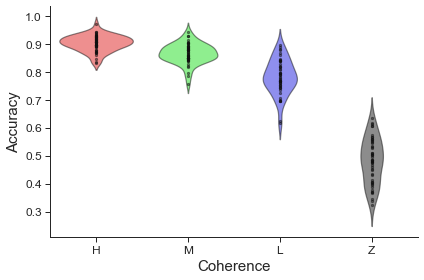

In [27]:
# fig 5c: violin plot of accuracy

if plot_c:
    fig, ax = plt.subplots()
    sns.violinplot(x = 'coh', y = 'acc', data = pd.DataFrame(all_acc_rt_df.to_dict()), inner='points', palette = color_palette, ax=ax)
    plt.setp(ax.collections, alpha = 0.5)
    ax.set(xlabel='Coherence', ylabel="Accuracy")
    ax.tick_params(bottom=True, left=True)
    plt.tight_layout()
    if save_plot:
        plt.savefig(join(plot_dir, "5c.pdf"))
    plt.show()

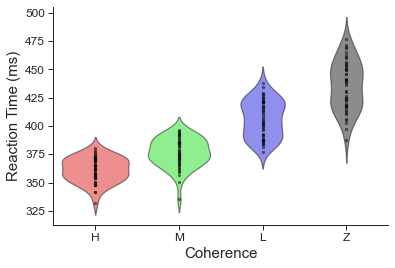

In [28]:
# fig 5d: violin plot of reaction time

if plot_d:
    fig, ax = plt.subplots()
    sns.violinplot(x = 'coh', y = 'rt', data = pd.DataFrame(all_acc_rt_df.to_dict()), inner='points', palette = color_palette, ax=ax)
    plt.setp(ax.collections, alpha = 0.5)
    ax.set(xlabel='Coherence', ylabel="Reaction Time (ms)")
    ax.tick_params(bottom=True, left=True)
    if save_plot:
        plt.savefig(join(plot_dir, "5d.pdf"))
    plt.show()